# Table of Contents
### 1. Import Libraries
### 2. Load Dataset
### 3 Select Relevant Columns
### 4. Data Cleaning
### 5. Data Visualization
### 6. Reshape Variables
### 7. Split Data into Training and Test Sets
### 8. Linear Regression Analysis
### 9. Thoughts On Model Performance

## 1. Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Dataset

In [82]:
file_path = '/Users/asadagha/Documents/CF Data Analytics/Data Analytics Immersion/Achievement 6/Ex 6.1/Cleaned_Heart_Health_Data.csv'
data = pd.read_csv(file_path)

## 3 Select Relevant Columns

In [84]:
data_subset = data[['PhysicalHealth', 'MentalHealth']].copy()

## 4. Data Cleaning

In [86]:
# Remove rows with missing values
data_subset = data_subset.dropna()  

## 5. Data Visualization

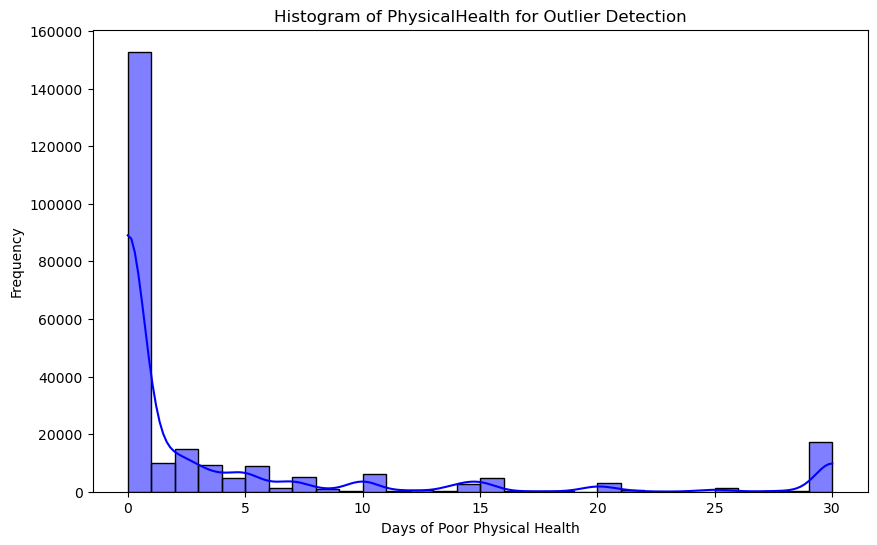

In [88]:
# Histogram with KDE for PhysicalHealth
plt.figure(figsize=(10, 6))
sns.histplot(data=data_subset, x='PhysicalHealth', kde=True, color='blue', bins=30)
plt.title('Histogram of PhysicalHealth for Outlier Detection')
plt.xlabel('Days of Poor Physical Health')
plt.ylabel('Frequency')
plt.show()

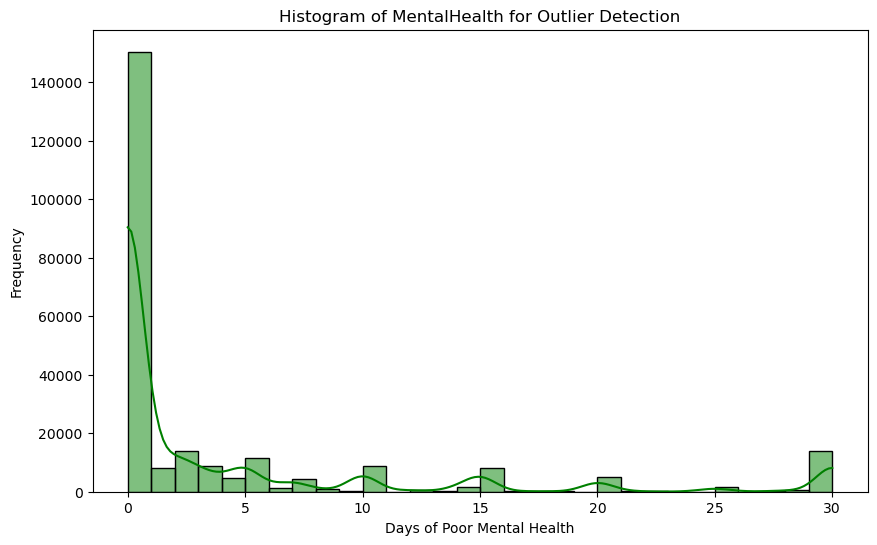

In [89]:
# Histogram with KDE for MentalHealth
plt.figure(figsize=(10, 6))
sns.histplot(data=data_subset, x='MentalHealth', kde=True, color='green', bins=30)
plt.title('Histogram of MentalHealth for Outlier Detection')
plt.xlabel('Days of Poor Mental Health')
plt.ylabel('Frequency')
plt.show()

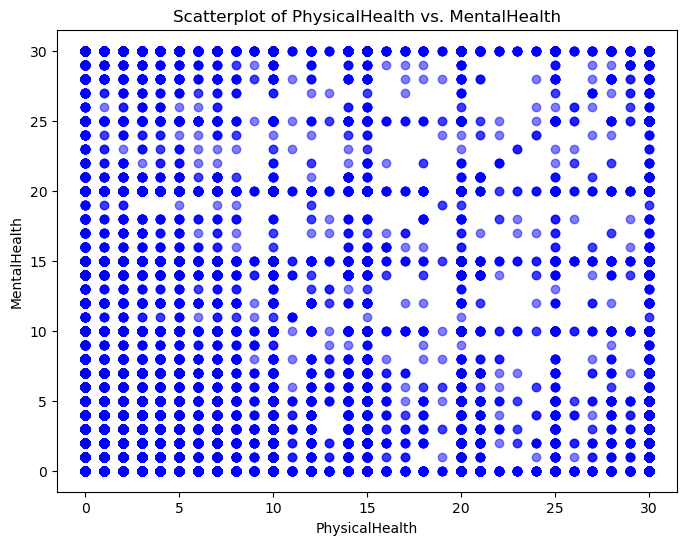

In [90]:
# Scatterplot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(data_subset['PhysicalHealth'], data_subset['MentalHealth'], color='blue', alpha=0.5)
plt.title("Scatterplot of PhysicalHealth vs. MentalHealth")
plt.xlabel("PhysicalHealth")
plt.ylabel("MentalHealth")
plt.show()

Hypothesis:

Null Hypothesis (H0): There is no linear relationship between the number of days of poor physical health (PhysicalHealth) and the number of days of poor mental health (MentalHealth).

Alternative Hypothesis (H1): There is a positive linear relationship between the number of days of poor physical health and the number of days of poor mental health. That is, as the number of poor physical health days increases, the number of poor mental health days also tends to increase.

## 6. Reshape Variables

In [93]:
# Reshape the variables into NumPy arrays
X = data_subset['PhysicalHealth'].values.reshape(-1, 1)  # Independent variable
y = data_subset['MentalHealth'].values  # Dependent variable

## 7. Split Data into Training and Test Sets

In [95]:
# Split the data into training and test sets (test size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8. Linear Regression Analysis

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predict y on the test set
y_pred = model.predict(X_test)

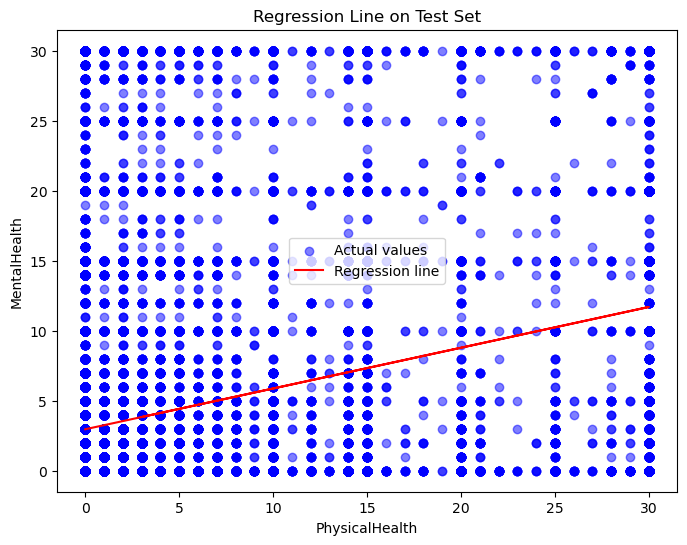

In [99]:
# Plot regression line on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title("Regression Line on Test Set")
plt.xlabel("PhysicalHealth")
plt.ylabel("MentalHealth")
plt.legend()
plt.show()

Interpretation:

The scatterplot of MentalHealth versus PhysicalHealth days shows considerable variability, with data points widely spread across all levels. This high dispersion indicates that individuals with the same number of poor physical health days experience a diverse range of poor mental health days, suggesting that physical health alone is not a reliable predictor of mental health outcomes.

Additionally, the fitted regression line, despite having a positive slope, shows limited predictive power as it does not closely follow the majority of the data points, many of which lie far above or below the line.

In [101]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 59.11
R-squared (R2): 0.10


In [102]:
# Create a DataFrame comparing actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(20))

    Actual  Predicted
0      0.0   2.961821
1      0.0   2.961821
2     15.0  11.696598
3      0.0   3.252981
4      0.0   2.961821
5     15.0  11.696598
6      0.0   2.961821
7      0.0   2.961821
8     10.0   5.873414
9      0.0   3.835299
10     0.0   2.961821
11     0.0   3.835299
12     0.0   2.961821
13     3.0   3.544140
14     0.0   2.961821
15    25.0   2.961821
16     0.0   2.961821
17     0.0   2.961821
18     0.0   4.417617
19     0.0   3.544140


## 9. Thoughts On Model Performance

The model did not perform well in predicting mental health outcomes, as shown by important statistics. An R-squared value of 0.10 means the model only explains 10% of the changes in mental health days based on the number of poor physical health days, leaving 90% unexplained. Additionally, the Mean Squared Error (MSE) of 59.11 shows that the predictions are far off from the actual values, indicating the model is not accurate. Visual inspection through scatterplots further confirms the model's limitations, displaying a wide dispersion of data points with no strong linear correlation despite a positive slope.

Many people in the dataset reported zero days of poor health, which means most of the data points are at zero. This large number of zeros makes it difficult for a simple linear model to work well because linear regression works best when the data is spread out more evenly. Mental health is affected by many factors, such as income, access to healthcare, genetics, environment, and lifestyle. If the data doesn't include these important factors, the model might seem biased or incomplete because it only uses physical health days to predict mental health outcomes.